In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use("fivethirtyeight")


from lifelines import KaplanMeierFitter

import kagglehub
from kagglehub import KaggleDatasetAdapter

from scipy.stats import chi2_contingency


In [ ]:


file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)



/tmp/ipykernel_37964/4242834790.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.shape

(7043, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [19]:
df['SeniorCitizen'].unique()

array([0, 1])

In [20]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(col, df[col].unique())
        print("-------------------------------------")

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-------------------------------------
gender ['Female' 'Male']
-------------------------------------
SeniorCitizen [0 1]
-------------------------------------
Partner ['Yes' 'No']
-------------------------------------
Dependents ['No' 'Yes']
-------------------------------------
PhoneService ['No' 'Yes']
-------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(col, len(df[df[col]== " "]))
    print("-------------------------------------")
    
    

tenure 0
-------------------------------------
MonthlyCharges 0
-------------------------------------
TotalCharges 11
-------------------------------------


In [26]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Data Visualization 

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.6 % of customers switched to another firm.

Customers are 49.5 % female and 50.5 % male.

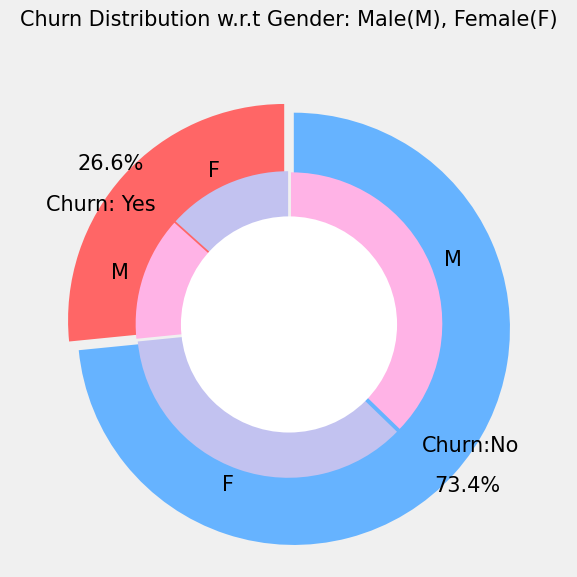

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

 
plt.axis('equal')
plt.tight_layout()
plt.show()

The analysis shows that gender has no significant impact on customers’ decision to change their service provider. Both males and females exhibit similar churn behavior.

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()



In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers with no TechSupport are most likely to migrate to another service provider.

In [60]:

object_columns = df.select_dtypes(include="object").columns

for col in object_columns:
    if col == "Churn":
        continue

    try:
        contingency = pd.crosstab(df['Churn'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"{col}: p-value = {p}")
    except Exception as e:
        print(f"Error with column {col}: {e}")


customerID: p-value = 0.49439767459438705
gender: p-value = 0.48657873605618596
Partner: p-value = 2.1399113440759935e-36
Dependents: p-value = 4.9249216612154196e-43
PhoneService: p-value = 0.3387825358066928
MultipleLines: p-value = 0.0034643829548773
InternetService: p-value = 9.571788222840544e-160
OnlineSecurity: p-value = 2.6611496351768565e-185
OnlineBackup: p-value = 2.0797592160865457e-131
DeviceProtection: p-value = 5.505219496457244e-122
TechSupport: p-value = 1.4430840279999813e-180
StreamingTV: p-value = 5.528994485739024e-82
StreamingMovies: p-value = 2.667756755723681e-82
Contract: p-value = 5.863038300673391e-258
PaperlessBilling: p-value = 4.073354668665985e-58
PaymentMethod: p-value = 3.6823546520097993e-140


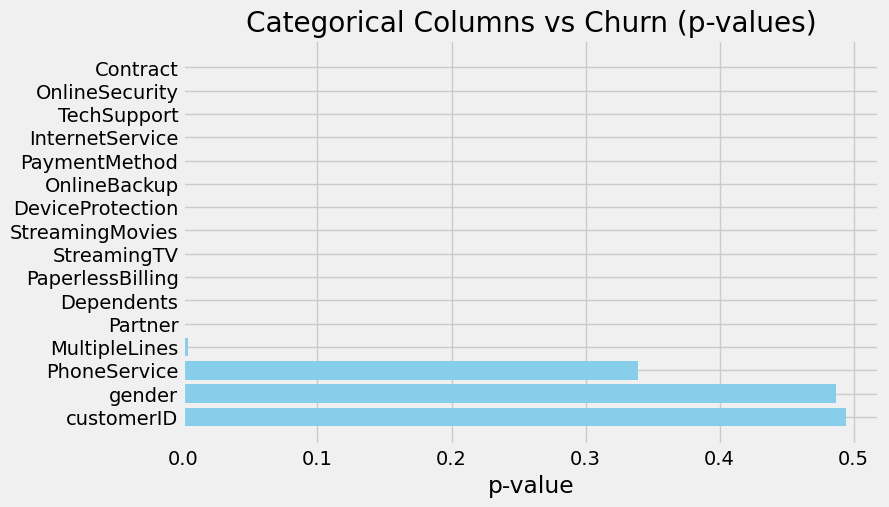

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

p_values = []

object_columns = df.select_dtypes(include="object").columns

for col in object_columns:
    if col == "Churn":
        continue

    try:
        contingency = pd.crosstab(df['Churn'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency)
        p_values.append((col, p))
    except Exception as e:
        print(f"Error with column {col}: {e}")

p_df = pd.DataFrame(p_values, columns=['Column', 'p_value'])

p_df = p_df.sort_values('p_value')

plt.figure(figsize=(8,5))
plt.barh(p_df['Column'], p_df['p_value'], color='skyblue')
plt.xlabel('p-value')
plt.title('Categorical Columns vs Churn (p-values)')
plt.gca().invert_yaxis() 
plt.show()


After performing the Chi-Square test on categorical variables, we observed that gender (p-value = 0.479) and PhoneService (p-value = 0.366) have high p-values, indicating they are not significantly associated with customer churn. Therefore, we decided to drop these two columns from the dataset as they are unlikely to contribute to model performance.

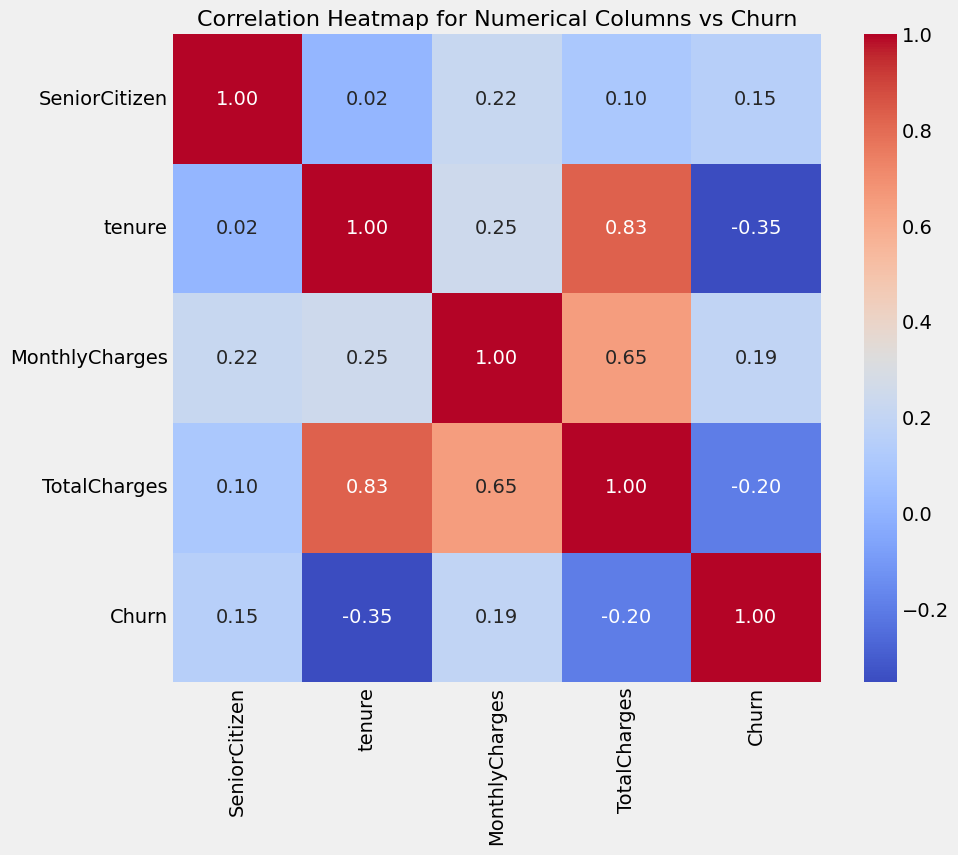

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy() 

df_copy = df_copy.drop(columns=['customerID'])

df_copy['Churn'] = df_copy['Churn'].map({'No': 0, 'Yes': 1})

numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr_matrix = df_copy[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap for Numerical Columns vs Churn", fontsize=16)
plt.show()


In [36]:
profit_by_service = df.groupby('InternetService')['MonthlyCharges'].sum().sort_values(ascending=False)
print(profit_by_service)
fig = px.bar(profit_by_service, x=profit_by_service.index, y=profit_by_service.values, 
             labels={'x': 'Internet Service', 'y': 'Total Monthly Charges'}, 
             title='<b>Total Monthly Charges by Internet Service Type</b>')
fig.show()

InternetService
Fiber optic    283284.40
DSL            140665.35
No              32166.85
Name: MonthlyCharges, dtype: float64


In [ ]:
lost_revenue = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
print(f"Estimated revenue lost due to churn: ${lost_revenue:.2f}")
fig = px.bar(profit_by_service, x=profit_by_service.index, y=profit_by_service.values, 
             labels={'x': 'Internet Service', 'y': 'Total Monthly Charges'}, 
             title='<b>Total Monthly Charges by Internet Service Type</b>')
fig.add_annotation(
    x=profit_by_service.idxmax(),
    y=profit_by_service.max(),
    text=f"Lost Revenue due to Churn: ${lost_revenue:.2f}",
    showarrow=True,
    arrowhead=1
)
fig.show()


Estimated revenue lost due to churn: $139130.85


In [ ]:
total_revenue_by_contract = df.groupby('Contract')['MonthlyCharges'].sum()

lost_revenue_by_contract = df[df['Churn']=='Yes'].groupby('Contract')['MonthlyCharges'].sum()

revenue_summary = pd.DataFrame({
    'Total Revenue': total_revenue_by_contract,
    'Lost Revenue': lost_revenue_by_contract
}).fillna(0)

revenue_summary['Loss %'] = (revenue_summary['Lost Revenue'] / revenue_summary['Total Revenue']) * 100

print(revenue_summary)


                Total Revenue  Lost Revenue     Loss %
Contract                                              
Month-to-month      257294.15     120847.10  46.968460
One year             95816.60      14118.45  14.734868
Two year            103005.85       4165.30   4.043751


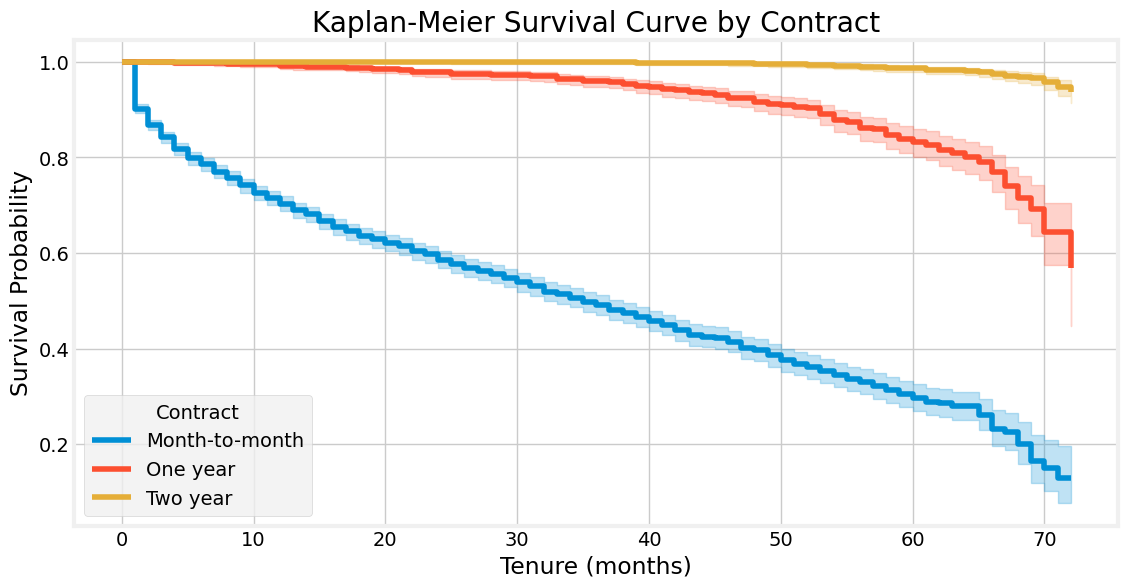

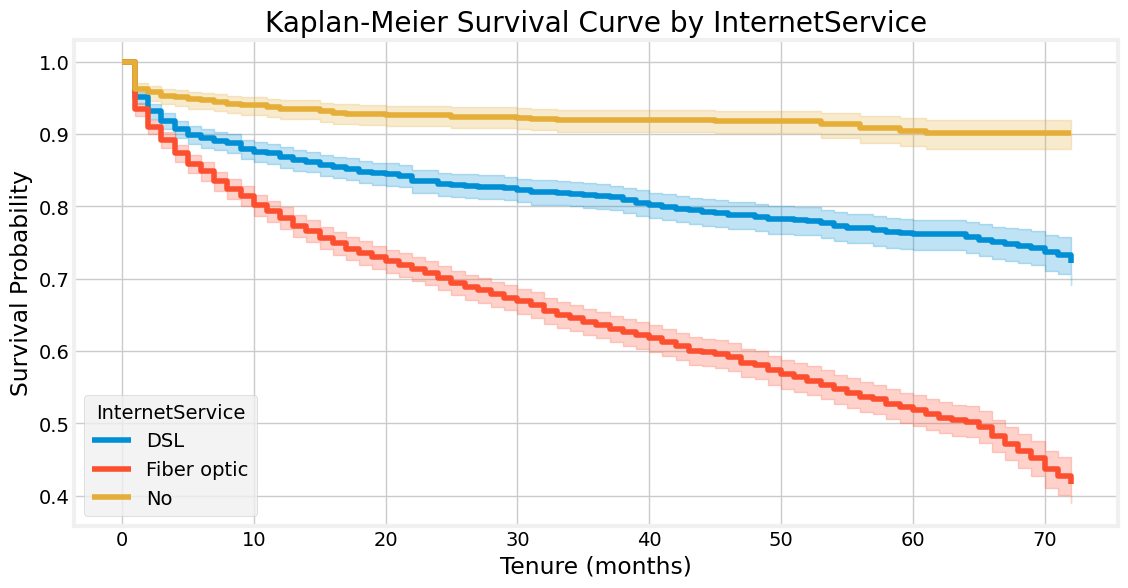

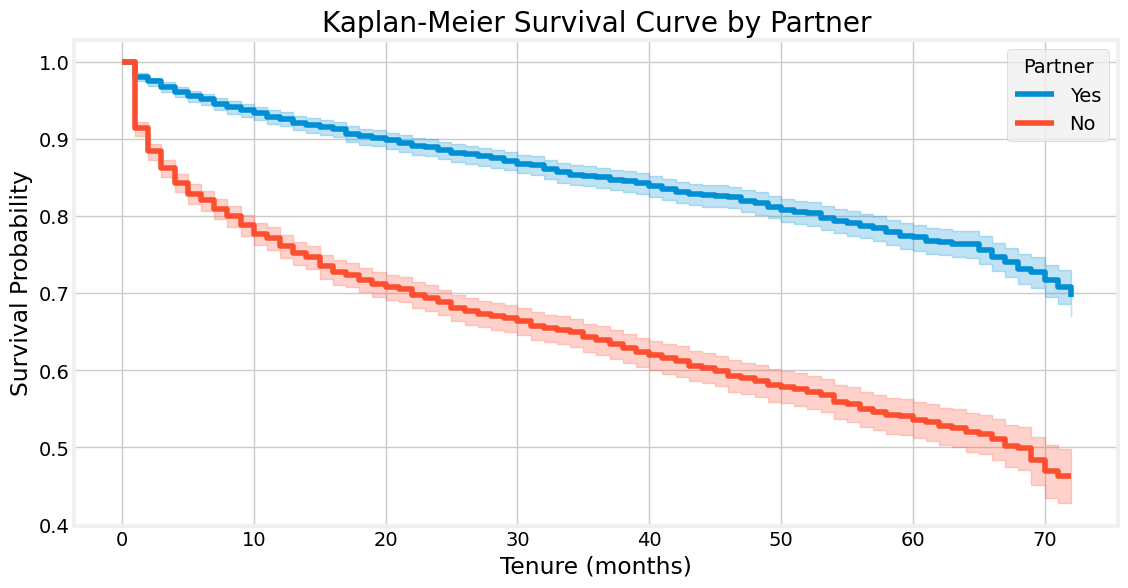

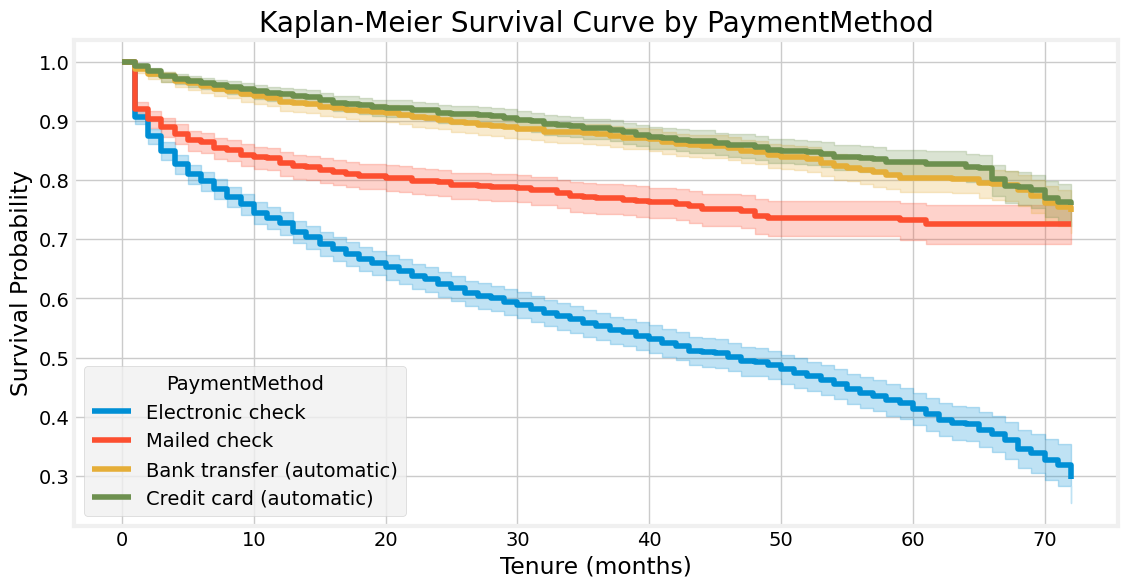

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

df_km = df.copy()
df_km['Churn'] = df_km['Churn'].map({'Yes': 1, 'No': 0})
columns_to_plot = ['Contract', 'InternetService', 'PaymentMethod']
kmf = KaplanMeierFitter()

for col in columns_to_plot:
    fig, ax = plt.subplots(figsize=(12,6))

    fig.patch.set_alpha(0.0)
    ax.set_facecolor('white')

    for group in df_km[col].unique():
        mask = df_km[col] == group
        kmf.fit(durations=df_km[mask]['tenure'], 
                event_observed=df_km[mask]['Churn'], 
                label=str(group))
        kmf.plot_survival_function(ax=ax)

    plt.title(f"Kaplan-Meier Survival Curve by {col}")
    plt.xlabel("Tenure (months)")
    plt.ylabel("Survival Probability")
    plt.legend(title=col)

    plt.show()


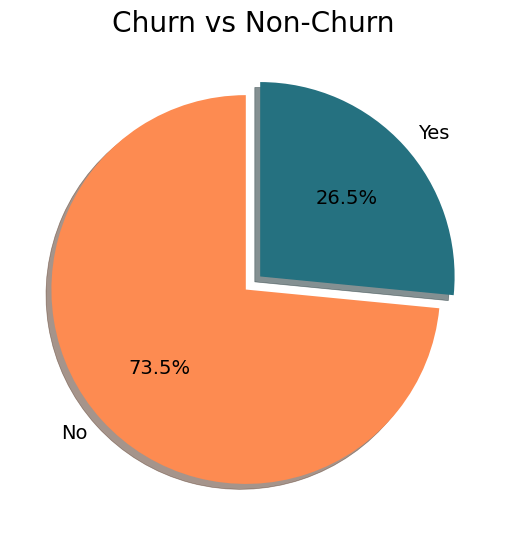

In [ ]:
import matplotlib.pyplot as plt

counts = df['Churn'].value_counts()  

colors = ['#FD8B51', '#257180']

plt.figure(figsize=(6,6))
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%',  
        startangle=90,     
        colors=colors,
        explode=(0.05,0.05),  
        shadow=True)

plt.title("Churn vs Non-Churn")

plt.gcf().patch.set_alpha(0.0)

plt.show()


/tmp/ipykernel_37964/289658950.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




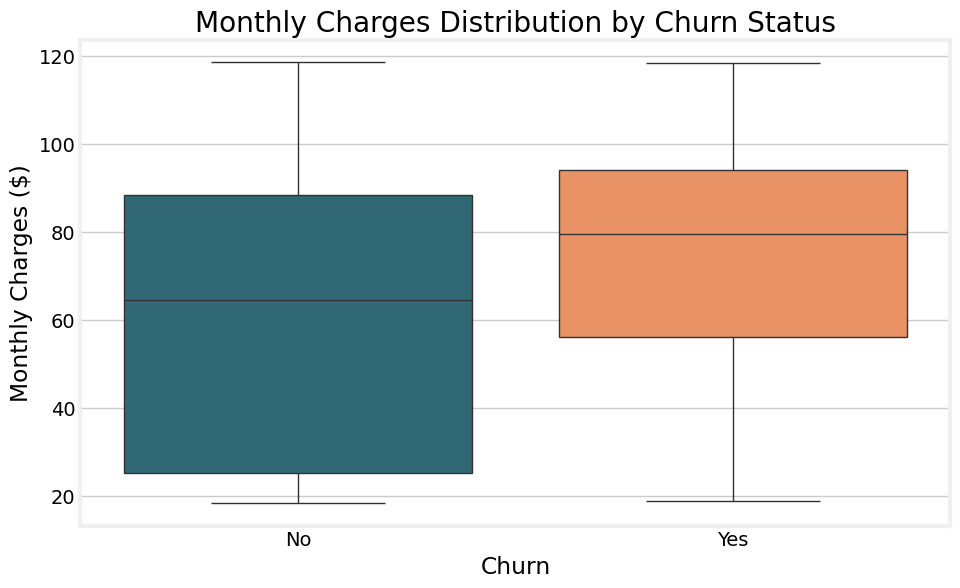

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['#257180','#FD8B51'])

plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")

plt.gcf().patch.set_alpha(0.0)
plt.gca().set_facecolor('none')

plt.show()


/tmp/ipykernel_37964/3281522645.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




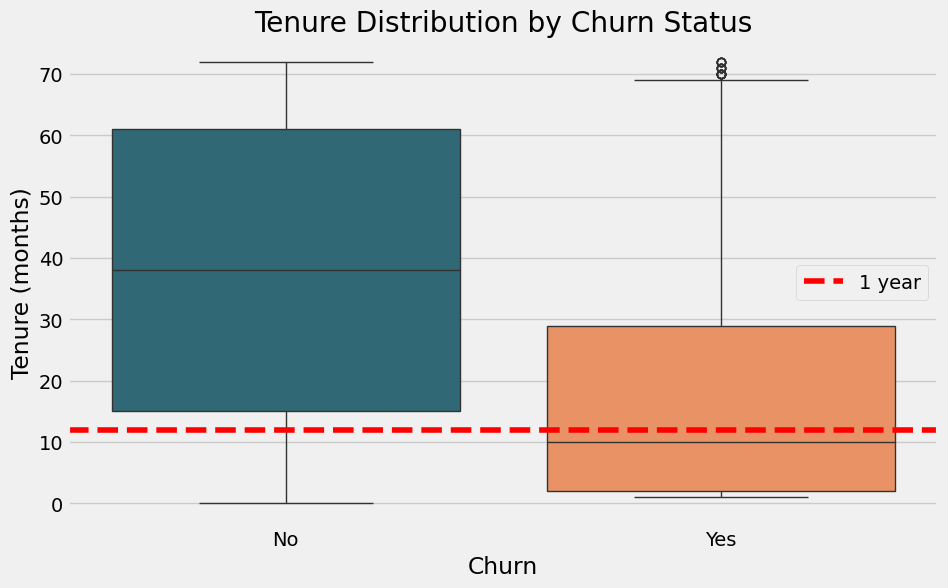

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df, palette=['#257180','#FD8B51'])

plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")

plt.axhline(y=12, color='red', linestyle='--', label='1 year')
plt.legend()

plt.show()


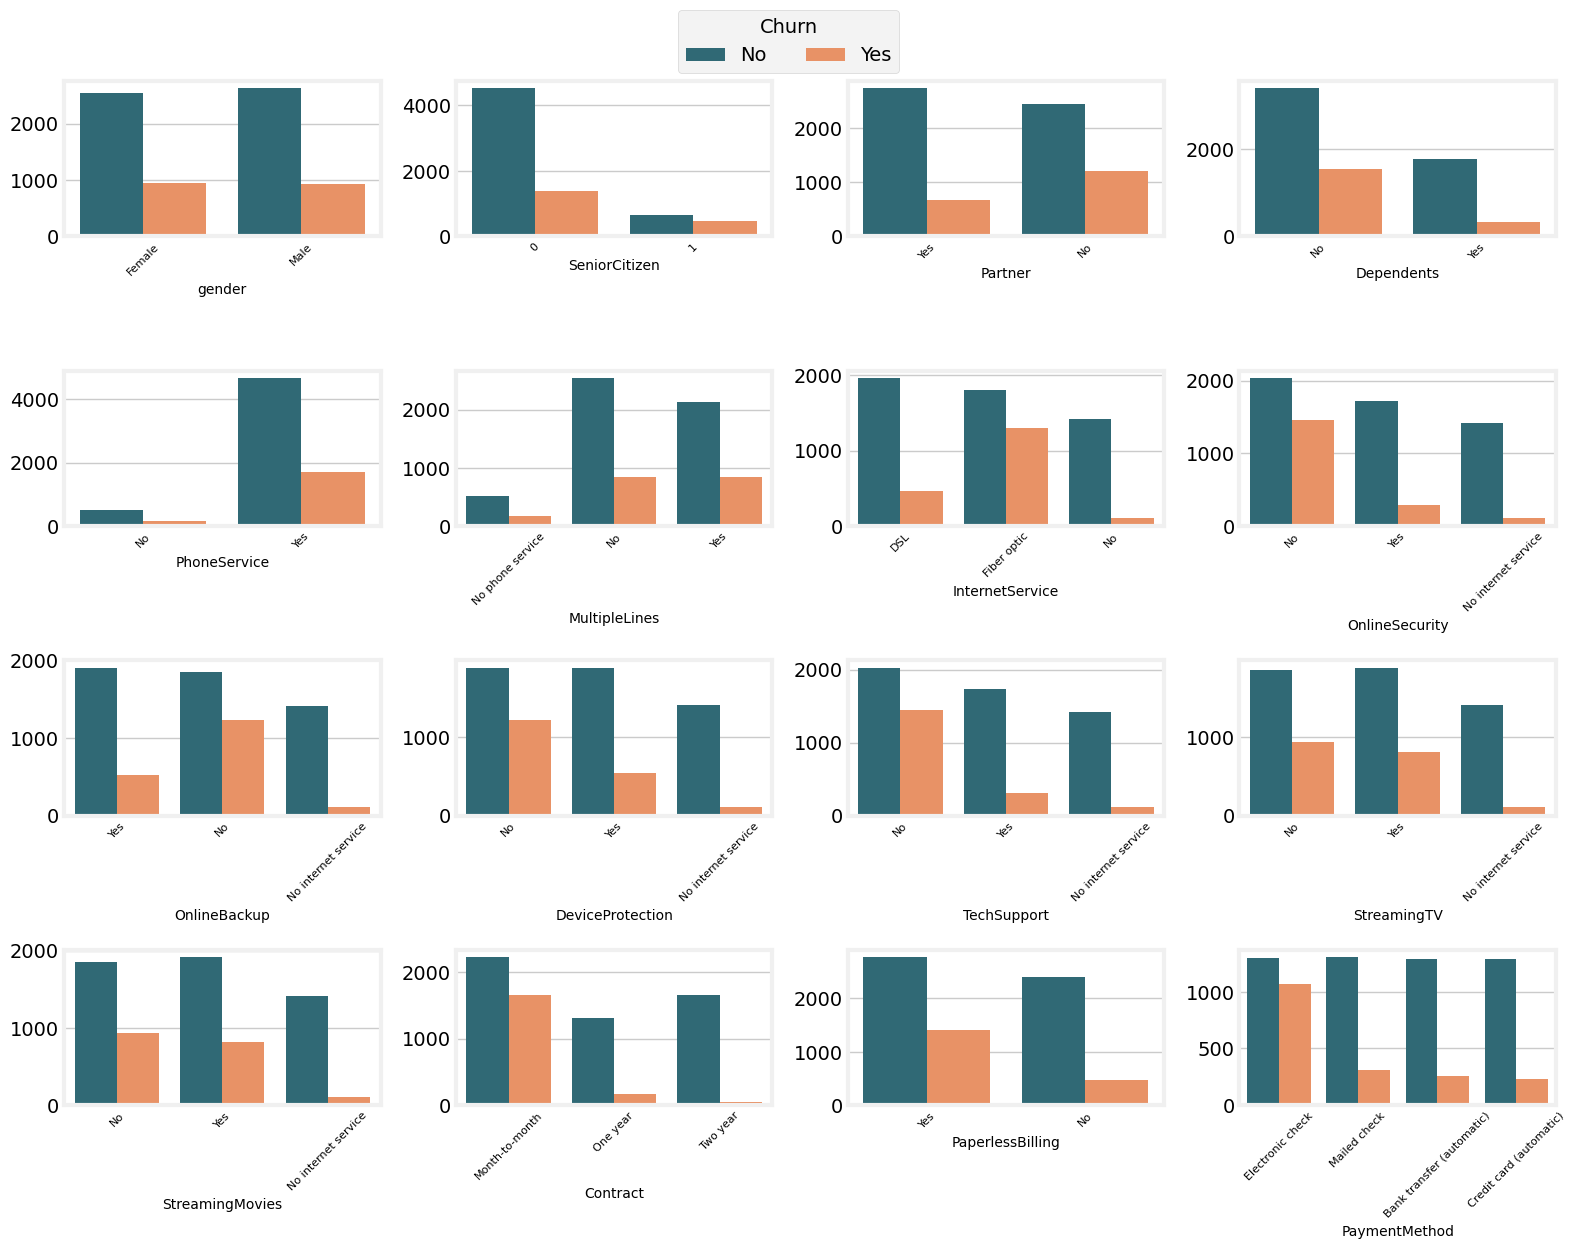

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

n_cols = 4
n_rows = (len(cat_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3*n_rows))

axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette=['#257180','#FD8B51'])
    axes[i].set_xlabel(col, fontsize=10)  
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  
    axes[i].set_facecolor('none')  

    axes[i].legend_.remove() if axes[i].legend_ else None

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.patch.set_alpha(0.0)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


In [59]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [ ]:
df.drop(columns = ['customerID','gender','PhoneService','MultipleLines'], inplace=True)

In [ ]:
df['is_long_term'] = (df['tenure'] > 12).astype(int)

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df['is_long_term'], df['Churn'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square p-value for is_long_term:", p)

if p < 0.05:
    print("is_long_term is significantly associated with Churn ✅")
else:
    print("is_long_term is NOT significantly associated with Churn ❌")


Chi-Square p-value for is_long_term: 3.68007400698092e-156
is_long_term is significantly associated with Churn ✅


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   float64
 16  Churn             7043 non-null   object 


In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_long_term
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [ ]:
import os
import pandas as pd

notebook_dir = os.path.dirname(os.getcwd())  

project_root = os.path.dirname(notebook_dir)

data_folder = os.path.join(project_root, "Data")

os.makedirs(data_folder, exist_ok=True)

output_path = os.path.join(data_folder, "FinalData.csv")

df.to_csv(output_path, index=False)

print(f"Dataset saved to: {output_path}")

Dataset saved to: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/Data/FinalData.csv
